# Quantum Fourier Transform (QFT)

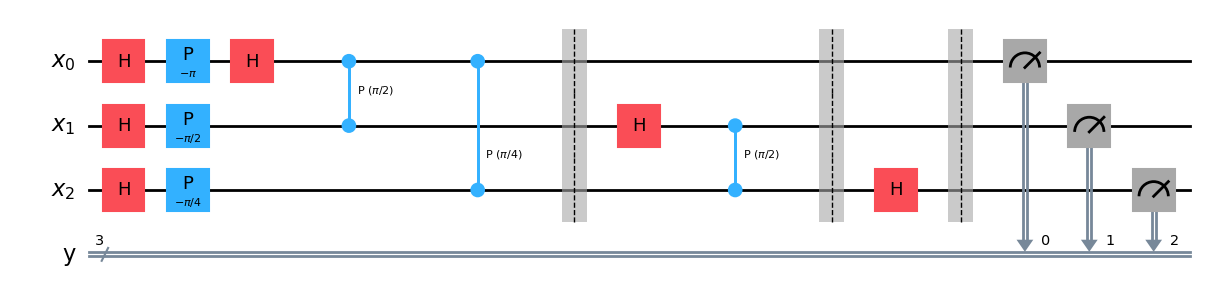

In [5]:
import math 
# importing Qiskit
from qiskit_aer import Aer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram

def input_state(circ, q, n): 
    "n-qubit input state for QFT that produces output 1."
    for j in range(n): 
        circ.h(q[j]) 
        circ.p(-math.pi/float(2**(j)), q[j]) 
         
def qft(circ, q, n): 
    "n-qubit QFT on q in circ."
    for j in range(n):
        circ.h(q[j]) 
        for k in range(j+1,n): 
            circ.cp(math.pi/float(2**(k-j)), q[k], q[j]) 
        circ.barrier()

q = QuantumRegister(3,'x')
c = ClassicalRegister(3,'y')
qft3 = QuantumCircuit(q, c) 
 
# first, prepare the state that should return 001
input_state(qft3, q, 3) 

# Perform the QFT on the prepared state
qft(qft3, q, 3)

#Measure the qubits 
for i in range(3):
    qft3.measure(q[i], c[i]) 
    
# Draw the entire circuit     
qft3.draw('mpl')


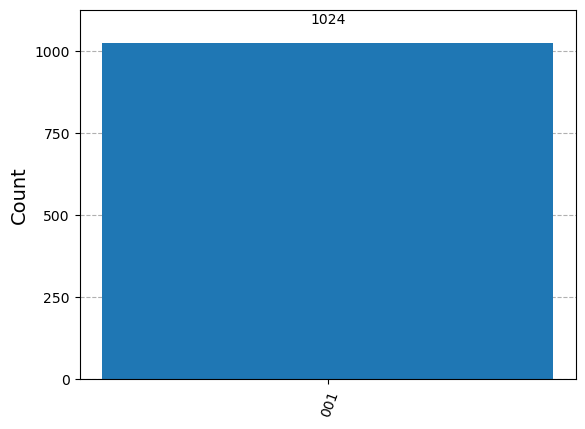

In [7]:
# run on local simulator
backend = Aer.get_backend("qasm_simulator") 
 
simulate = backend.run(qft3,shots=1024).result()
counts=simulate.get_counts()
plot_histogram(counts)